## Importing libraries

In [1]:
import math
import numpy as np
from PIL import Image

min_ = []
max_ = []

## Obtaining the image representation of non-Euclidean data


-------------Filename:0.obj-------------
Original Vertices (v):
 [[ 0.025453 -0.04677   0.04755 ]
 [ 0.025487 -0.047997  0.04824 ]
 [ 0.022989 -0.042484  0.051434]
 [ 0.022997 -0.04295   0.051215]
 [ 0.02264  -0.042612  0.051431]]
Rotated Vertices:
 [[0.04677 0.025453 0.04755]
 [0.047997 0.025487 0.04824]
 [0.042484 0.022989 0.051434]
 [0.04295 0.022997 0.051215]
 [0.042612 0.02264 0.051431]]

Minimum vertex value:  -0.0959 
Maximum vertex value: 0.0959 


UV coordinates (vt):
 [[0.804414 0.505306]
 [0.747333 0.490974]
 [0.779113 0.461074]
 [0.537987 0.831977]
 [0.495288 0.848342]]

Faces (f):
 [['480/1', '126/2', '478/3'], ['35/4', '440/5', '441/6'], ['53/7', '159/8', '52/9'], ['179/10', '423/11', '178/12'], ['170/13', '428/14', '171/15']]

Vertex indices (v):
 [[479, 125, 477], [34, 439, 440], [52, 158, 51], [178, 422, 177], [169, 427, 170]]

Vertex texture indices (vt):
 [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14]]


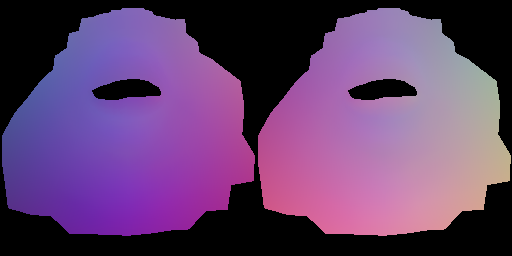

In [2]:
for n in range(0,100): #100,100,500
    file = open(f'mouths_1/{n}.obj'.format(n)) #mouths_1, mouths_2, part1_meshes
    vertex = []
    for line in file:
        if line.startswith('v '):
            vertex.append(line)


    vertex = [item.replace('v ', '') for item in vertex]
    vertex = [item.replace('\n', '') for item in vertex]
    vertex = [i.split(" ") for i in vertex]
    vertex = np.asarray(vertex)
    vertex = vertex.astype(np.float64)
    
    vertex_r = np.empty(shape=(534, 3), dtype=object)
    vertex_r[:,[1,0,2]] = vertex[:,[0,1,2]]
    vertex_r[:,0] = vertex_r[:,0] * -1
    
    print(f"\n-------------Filename:{n}.obj-------------".format(n))
    print("Original Vertices (v):\n",vertex[:5])
    print("Rotated Vertices:\n",vertex_r[:5])
    
    min_.append(np.min(vertex))
    min_.append(np.min(vertex_r))
    max_.append(np.max(vertex))
    max_.append(np.max(vertex_r))
    
# Getting the normalization range
    print("\nMinimum vertex value: ",round(min(min_),ndigits=4), "\nMaximum vertex value:",round(max(max_),ndigits=4),"\n") #-0.128979 #0.067338

    file = open('template/test_w.obj')
    uv_cords = []
    for line in file:
        if line.startswith('vt '):
            uv_cords.append(line)

# UV coordinates            
    uv_cords = [item.replace('vt ', '') for item in uv_cords]
    uv_cords = [item.replace('\n', '') for item in uv_cords]
    uv_cords = [i.split(" ") for i in uv_cords]
    uv_cords = np.asanyarray(uv_cords)
    uv_cords = uv_cords.astype(np.float64)
    print("\nUV coordinates (vt):\n",uv_cords[:5])

# Faces (f v/vt)

    file = open('template/test_w.obj')
    face = []
    for line in file:
        if line.startswith('f '):
            face.append(line)

    face = [item.replace('f ', '') for item in face]
    face = [item.replace('\n', '') for item in face]
    face = [i.split(" ") for i in face]
    print("\nFaces (f):\n",face[:5])


    face_vertex_indices = [[x.split('/',1)[0] for x in i] for i in face]
    face_vertex_indices = [list(map(int, sublist)) for sublist in face_vertex_indices]
    face_vertex_indices = [[x - 1 for x in l] for l in face_vertex_indices]
    print("\nVertex indices (v):\n",face_vertex_indices[:5])

    face_vertex_texture_indices = [[x.split('/',1)[-1] for x in i] for i in face]
    face_vertex_texture_indices = [list(map(int, sublist)) for sublist in face_vertex_texture_indices]
    face_vertex_texture_indices = [[x - 1 for x in l] for l in face_vertex_texture_indices]
    print("\nVertex texture indices (vt):\n",face_vertex_texture_indices[:5])


    mouth_image = np.zeros((256,256,3),dtype=np.uint8)
    u = np.linspace(0,1,35)
    v = np.linspace(0,1,35)
    n_range = [-0.13 ,0.13]
    for i, j in zip(face_vertex_indices, face_vertex_texture_indices):  
        A_index = i[0]
        B_index = i[1]
        C_index = i[2]
        U_index = j[0]
        V_index = j[1]
        W_index = j[2]

        A_v = vertex[A_index]
        B_v = vertex[B_index]
        C_v = vertex[C_index]
        U_vt = uv_cords[U_index]
        V_vt = uv_cords[V_index]
        W_vt = uv_cords[W_index]

        P = []
        P_uv = []
        B_A = np.subtract(B_v,A_v)
        C_A = np.subtract(C_v,A_v)
        V_U = np.subtract(V_vt,U_vt)
        W_U = np.subtract(W_vt,U_vt)
        for r in u:
            for t in v:
                if r+t<=1:
                    P.append(A_v+(r*B_A)+(t*C_A))
                    P_uv.append(U_vt+(r*V_U)+(t*W_U))

        
        norm_P=[]

        for v_ in P:
            v_[0] = math.floor((float(v_[0])-n_range[0])*256/(n_range[1]-n_range[0]))
            v_[1] = math.floor((float(v_[1])-n_range[0])*256/(n_range[1]-n_range[0]))
            v_[2] = math.floor((float(v_[2])-n_range[0])*256/(n_range[1]-n_range[0]))
            norm_P.append(v_)

        for row in range(len(P)):

            m = math.floor(P_uv[row][0]*256)
            n = math.floor(P_uv[row][1]*256)
            for col in range(3):
                mouth_image[m][n][col] = norm_P[row][col]
        
        mouth_image_original = Image.fromarray(mouth_image, 'RGB')
        mouth_image_original = mouth_image_original.rotate(90)

    mouth_image = np.zeros((256,256,3),dtype=np.uint8)
    for i, j in zip(face_vertex_indices, face_vertex_texture_indices):  

        A_index = i[0]
        B_index = i[1]
        C_index = i[2]
        U_index = j[0]
        V_index = j[1]
        W_index = j[2]

        A_v = vertex_r[A_index]
        B_v = vertex_r[B_index]
        C_v = vertex_r[C_index]
        U_vt = uv_cords[U_index]
        V_vt = uv_cords[V_index]
        W_vt = uv_cords[W_index]

        P = []
        P_uv = []
        B_A = np.subtract(B_v,A_v)
        C_A = np.subtract(C_v,A_v)
        V_U = np.subtract(V_vt,U_vt)
        W_U = np.subtract(W_vt,U_vt)
        for r in u:
            for t in v:
                if r+t<=1:
                    P.append(A_v+(r*B_A)+(t*C_A))
                    P_uv.append(U_vt+(r*V_U)+(t*W_U))

        norm_P=[]


        for v_ in P:
            v_[0] = math.floor((float(v_[0])-n_range[0])*256/(n_range[1]-n_range[0]))
            v_[1] = math.floor((float(v_[1])-n_range[0])*256/(n_range[1]-n_range[0]))
            v_[2] = math.floor((float(v_[2])-n_range[0])*256/(n_range[1]-n_range[0]))
            norm_P.append(v_)

        for row in range(len(P)):

            m = math.floor(P_uv[row][0]*256)
            n = math.floor(P_uv[row][1]*256)
            for col in range(3):
                mouth_image[m][n][col] = norm_P[row][col]
        
        mouth_image_rotated = Image.fromarray(mouth_image, 'RGB')
        mouth_image_rotated = mouth_image_rotated.rotate(90)
    
    input_ = Image.new('RGB',(512,256),(0,0,0))
    input_.paste(mouth_image_original,(0,0))
    input_.paste(mouth_image_rotated,(256,0))
input_

# To save the input image
#     input_.save(f"input/input_{n}.png","PNG".format(n))

## Validating ground truth and predicted image

In [3]:
def ground_truth(rgb_im):
    left = 430
    up = 414
    right = 676
    down = 660
    ground_truth_box = (left,up,right,down)
    ground_truth = rgb_im.crop(ground_truth_box)
    return np.asarray(ground_truth)


def input_image(rgb_im):
    left = 136
    up = 414
    right = 382
    down = 660
    input_image_box = (left,up,right,down)
    input_image = rgb_im.crop(input_image_box)
    return np.asarray(input_image)

def predicted_image(rgb_im):
    left = 726
    up = 414
    right = 972
    down = 660
    predicted_image_box = (left,up,right,down)
    predicted_image = rgb_im.crop(predicted_image_box)
    return np.asarray(predicted_image)

In [4]:
def compare_ground_truth(filename1, filename2):
    im1 = Image.open(f'results/{filename1}.png'.format(filename1))
    im2 = Image.open(f'results/{filename2}.png'.format(filename2))
    rgb_im1 = im1.convert('RGB')
    rgb_im2 = im2.convert('RGB')
    return (sum(1 for x,y in zip(ground_truth(rgb_im1).flatten(),ground_truth(rgb_im2).flatten()) if x == y) / len(ground_truth(rgb_im1).flatten()) * 100)


In [5]:
print("Comparing ground truths at different stages: ",compare_ground_truth('0k','1k')) # ('0k','2k'), ('0k','5k'), ('0k','10k'), ('0k','15k') ('0k','20k') ('0k','25k') ('0k','30k') ('0k','40k')

Comparing ground truths at different stages:  100.0


In [6]:
def validate_images(filename):
    im = Image.open(f'results/{filename}.png'.format(filename))
    rgb_im = im.convert('RGB')
    return (sum(1 for x,y in zip(ground_truth(rgb_im).flatten(),predicted_image(rgb_im).flatten()) if x == y) / len(ground_truth(rgb_im).flatten()) * 100)

In [7]:
print("Accuracy after:")
print("0k steps: ",round(validate_images('0k'),2),"%")

print("1k steps: ",round(validate_images('1k'),2),"%")

print("2k steps: ",round(validate_images('2k'),2),"%")

print("5k steps: ",round(validate_images('5k'),2),"%")

print("10k steps: ",round(validate_images('10k'),2),"%")

print("15k steps: ",round(validate_images('15k'),2),"%")

print("20k steps: ",round(validate_images('20k'),2),"%")

print("25k steps: ",round(validate_images('25k'),2),"%")

print("30k steps: ",round(validate_images('30k'),2),"%")

print("40k steps: ",round(validate_images('40k'),2),"%")

Accuracy after:
0k steps:  0.33 %
1k steps:  21.56 %
2k steps:  35.2 %
5k steps:  61.18 %
10k steps:  77.38 %
15k steps:  68.78 %
20k steps:  81.68 %
25k steps:  72.95 %
30k steps:  75.59 %
40k steps:  78.71 %
